In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import tensorflow as tf
import os
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('AP001.csv')

In [62]:
print("Ukuran Sampel ",df.shape[0])

Ukuran Sampel  59150


In [60]:
df.describe(include='all')

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg),VWS (m/s),Xylene (ug/m3),RF (mm),AT (degree C)
count,59150,59150,54323.000000,54450.000000,55153.000000,55100.000000,55315.000000,53564.000000,54285.000000,54673.000000,...,55113.000000,55281.000000,55299.000000,54656.000000,54589.000000,1201.000000,55341.000000,55200.000000,55285.000000,55087.000000
unique,59150,59150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-07-01 10:00:00,2016-07-01 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,29.718423,58.531252,13.077963,39.195409,31.171453,10.057892,5.782241,0.634884,...,30.296565,71.962430,1.170445,180.160190,72.830661,755.713988,-0.015668,0.316406,0.052524,22.279584
std,NaN,NaN,21.365617,32.388101,16.124784,30.716953,25.048555,5.949501,4.538823,0.850052,...,2.885504,13.575538,0.719358,74.972401,131.376023,14.906888,0.165063,1.594764,0.441987,3.006088
min,NaN,NaN,0.250000,1.000000,0.100000,0.100000,0.000000,0.100000,0.030000,0.000000,...,7.300000,15.250000,0.080000,1.000000,0.000000,725.000000,-17.600000,0.000000,0.000000,4.680000
25%,NaN,NaN,13.250000,34.000000,3.800000,17.400000,13.780000,6.200000,3.650000,0.350000,...,28.770000,62.500000,0.600000,123.750000,3.000000,751.500000,-0.100000,0.030000,0.000000,20.200000
50%,NaN,NaN,24.000000,53.500000,8.100000,30.650000,24.880000,8.420000,5.150000,0.570000,...,29.880000,73.750000,1.050000,183.500000,8.000000,755.250000,-0.030000,0.100000,0.000000,22.050000
75%,NaN,NaN,42.500000,78.500000,16.170000,52.950000,41.150000,12.200000,6.970000,0.790000,...,31.350000,84.000000,1.600000,235.250000,71.000000,758.000000,0.030000,0.250000,0.000000,24.250000


In [3]:
df.isna().sum()

From Date              0
To Date                0
PM2.5 (ug/m3)       4827
PM10 (ug/m3)        4700
NO (ug/m3)          3997
NO2 (ug/m3)         4050
NOx (ppb)           3835
NH3 (ug/m3)         5586
SO2 (ug/m3)         4865
CO (mg/m3)          4477
Ozone (ug/m3)       4583
Benzene (ug/m3)     3937
Toluene (ug/m3)     3937
Temp (degree C)     4037
RH (%)              3869
WS (m/s)            3851
WD (deg)            4494
SR (W/mt2)          4561
BP (mmHg)          57949
VWS (m/s)           3809
Xylene (ug/m3)      3950
RF (mm)             3865
AT (degree C)       4063
dtype: int64

In [4]:
columns_to_drop = ['Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)', 'Temp (degree C)',
                       'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)',
                       'Xylene (ug/m3)', 'RF (mm)', 'AT (degree C)']

df_cleaned = df.drop(columns = columns_to_drop,axis = 1)

In [5]:
df_cleaned.isna().sum()

From Date           0
To Date             0
PM2.5 (ug/m3)    4827
PM10 (ug/m3)     4700
NO (ug/m3)       3997
NO2 (ug/m3)      4050
NOx (ppb)        3835
NH3 (ug/m3)      5586
SO2 (ug/m3)      4865
CO (mg/m3)       4477
dtype: int64

In [6]:
df_cleaned = df_cleaned.dropna()

In [7]:
df_cleaned.isna().sum()

From Date        0
To Date          0
PM2.5 (ug/m3)    0
PM10 (ug/m3)     0
NO (ug/m3)       0
NO2 (ug/m3)      0
NOx (ppb)        0
NH3 (ug/m3)      0
SO2 (ug/m3)      0
CO (mg/m3)       0
dtype: int64

In [8]:
df_cleaned.shape[0]

50360

In [9]:
df_cleaned = df_cleaned.drop(columns='To Date')

In [10]:
df_cleaned['From Date'] = pd.to_datetime(df_cleaned['From Date'])
df_cleaned = df_cleaned.rename(columns={'From Date':'datetime'})

In [59]:
df_cleaned.describe(include='all')

<ipython-input-59-08fa109c79a8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_cleaned.describe(include='all')
Exception ignored in: <function _xla_gc_callback at 0x7a518bb12a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


,datetime,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3)
count,50360,50360.000000,50360.000000,50360.000000,50360.000000,50360.00000,50360.000000,50360.000000,50360.000000
unique,50360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-07-01 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2016-07-01 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-03-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,30.188339,59.211347,12.758866,38.848950,30.84303,9.981034,5.814099,0.645449
std,NaN,21.550462,32.622815,14.673666,30.571785,24.15721,5.754712,4.452163,0.859934
min,NaN,0.250000,1.000000,0.100000,0.100000,1.07000,0.100000,0.030000,0.000000
25%,NaN,13.500000,34.500000,3.800000,17.500000,13.90000,6.200000,3.650000,0.360000


In [12]:
def plot_stacked_line_chart(df):
  first_column = df.columns[0]
  plt.figure(figsize=(10, 6))
  for column in df.columns[1:]:
    plt.plot(df[first_column],df[column],label=f'{first_column}-{column}')
  plt.xlabel(first_column)
  plt.ylabel('Values')
  plt.title(f'{first_column} Against Other Columns')
  plt.legend()
  plt.show()

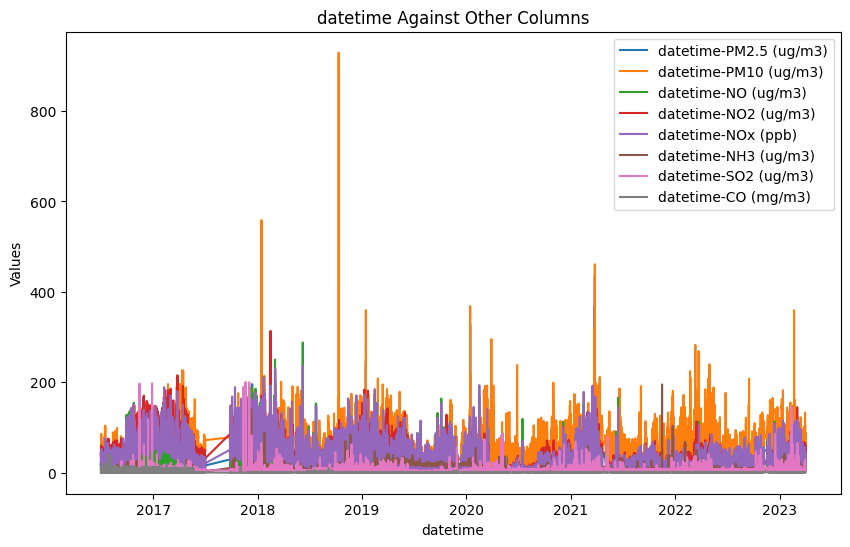

In [13]:
plot_stacked_line_chart(df_cleaned)

### Date terhadap CO

In [25]:
df_used = df_cleaned['CO (mg/m3)'].values
df_used

array([0.48, 0.47, 0.51, ..., 0.85, 0.83, 0.81])

In [67]:
df_used.shape[0]

50360

### Normalisasi Data

In [49]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
co_reshaped = np.array(df_used).reshape(-1, 1)
standard_scaler = StandardScaler()
standard_scaler.fit(co_reshaped)
co_normalized = standard_scaler.transform(co_reshaped)
co_normalized = co_normalized.flatten()
print(co_normalized)

[-0.19239938 -0.20402829 -0.15751265 ...  0.23787037  0.21461254
  0.19135472]


In [50]:
X_train, X_val = train_test_split(co_normalized, test_size=0.2, shuffle=False)

In [51]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [65]:
train_set = windowed_dataset(X_train, window_size=60, batch_size=100, shuffle_buffer=1000)
validation_set = windowed_dataset(X_val, window_size=60, batch_size=100, shuffle_buffer=1000)

model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(70, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [53]:
threshold_mae = (df_cleaned['CO (mg/m3)'].max() - df_cleaned['CO (mg/m3)'].min()) * 10/100

In [54]:
threshold_mae

4.11

In [55]:
class MyCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('val_mae') < threshold_mae):
        print(f"\nMAE telah tercapai {threshold_mae}")
        self.model.stop_training = True

on_stop = MyCallBack()

In [56]:
checkpoint_path = "time_series"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="mae",
                                      save_best_only=True)

In [68]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1.0000e-04)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100,validation_data = validation_set,callbacks = [on_stop, checkpoint_callback])

Epoch 1/100
    401/Unknown - 15s 26ms/step - loss: 0.1151 - mae: 0.2717
MAE telah tercapai 4.11
403/403 [==============================] - 19s 36ms/step - loss: 0.1149 - mae: 0.2713 - val_loss: 0.0172 - val_mae: 0.1351
